In [77]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [137]:
#reading the dataset
df=pd.read_csv(r'C:\Users\tusha\Documents\Data Science\Courses\Refactored_Py_DS_ML_Bootcamp-master\15-Decision-Trees-and-Random-Forests\kyphosis.csv')

In [138]:
print(df.head(),'\n')
#this dataframe represents the occurence of kyphosis after the operation
#Age- patient's age
#Number - no of vertebrae operated on
#Start - topmost vertebrae on which the operation begun

from sklearn.preprocessing import LabelEncoder  #One hot encoding the target variable into {'absent':0,'present':1}
label_encoder=LabelEncoder()
df['Kyphosis']= label_encoder.fit_transform(df['Kyphosis'])
print(df['Kyphosis'],'\n')

  Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15 

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32 



In [139]:
print(df['Start'].unique(),'\n')
print(df['Age'].unique(),'\n')
print(df['Number'].unique(),'\n')

[ 5 14  1 15 16 17 12  2 18 13  9  3  6 11 10  8] 

[ 71 158 128   2   1  61  37 113  59  82 148  18 168  78 175  80  27  22
 105  96 131  15   9   8 100   4 151  31 125 130 112 140  93  52  20  91
  73  35 143  97 139 136 121 177  68  72 120  51 102 114  81 118  17 195
 159 127  87 206  11 178 157  26  42  36] 

[ 3  4  5  2  6  7  9 10] 



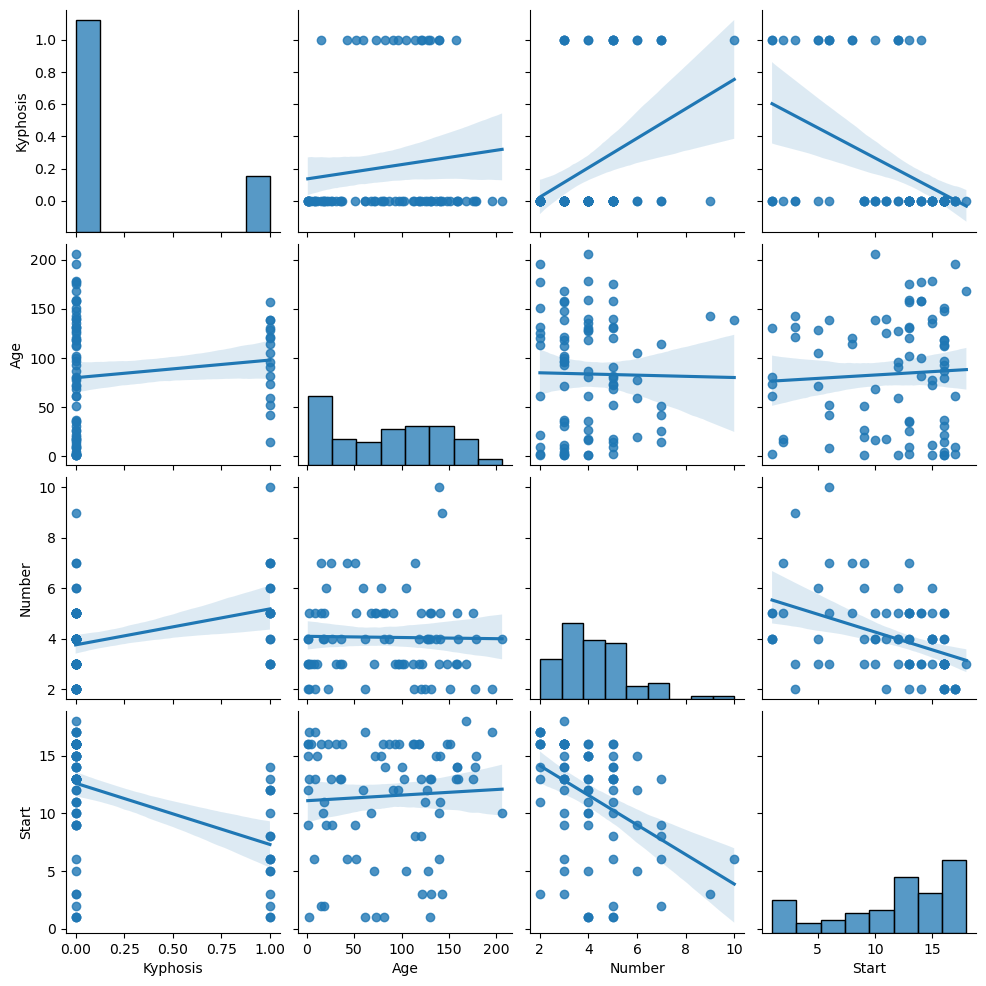

In [140]:
sns.pairplot(df,kind='reg')

In [83]:
df['Kyphosis'].value_counts(normalize= True) #finding the distribution of target variable
#data is imbalanced as no of 1s is ~20% and 0 is ~80%

0    0.790123
1    0.209877
Name: Kyphosis, dtype: float64

In [84]:
df.loc[df['Kyphosis']==1,['Age']].value_counts(normalize=True)
# we find that as the age increases, tendancy of a person to have Kyphosis increase

Age
139    0.117647
15     0.058824
42     0.058824
52     0.058824
59     0.058824
73     0.058824
82     0.058824
91     0.058824
96     0.058824
105    0.058824
114    0.058824
120    0.058824
121    0.058824
128    0.058824
130    0.058824
157    0.058824
dtype: float64

In [141]:
# standardizing the features  as we want to to find the importances of features using Random Forest Algorithm
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1=sc.fit_transform(df.iloc[:,1:4])
df1=pd.DataFrame(data=df1,columns=df.columns[1:4])
df1['Kyphosis']=df['Kyphosis'].copy()

In [112]:
#We use oversampling to increase the size of the dataset as the size of the dataset is relatively small
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0,)
X=df1.iloc[:,0:3]
y=df1.iloc[:,-1]
X_resample,y_resample=sm.fit_resample(X,y)

In [144]:
#Creating train and test data sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_resample,y_resample,test_size=0.3)

In [145]:
#Finding the shape of datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(89, 3)
(89,)
(39, 3)
(39,)


In [115]:
# Initializing RandomForest classifier
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
print(rf.feature_names_in_)
print(rf.feature_importances_)

['Age' 'Number' 'Start']
[0.34441921 0.23494512 0.42063567]


<Axes: >

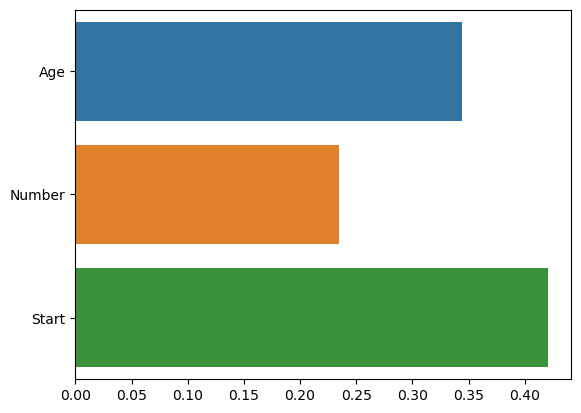

In [116]:
#Using barplot to find the most important features
sns.barplot(x=rf.feature_importances_,y=rf.feature_names_in_)

In [117]:
# Initializing Decision Tree and Support Vector Machines classifier
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
from sklearn.svm import SVC
svc=SVC()

In [118]:
#fitting the Decision tree and Support Vector Machines classifier
dtree.fit(X_train,y_train)
svc.fit(X_train,y_train)
models ={'random_forest':rf,'decision_tree':dtree,'svm':svc}

In [128]:
#Calculating Accuracy scores and Matthews correlation cofficiencts
from sklearn.metrics import accuracy_score, matthews_corrcoef
for key,value in models.items():
    pred =value.predict(X_test)
    score=accuracy_score(y_test,pred)
    mcc=matthews_corrcoef(y_test,pred)
    print(f' Accuracy score for {key} is {score}')
    print(f'Matthews correlation coefficient for {key} is {mcc}','\n')
# clearly we can see that Random forest outperforms Decision tree algorithm and SVM   

 Accuracy score for random_forest is 0.9230769230769231
Matthews correlation coefficient for random_forest is 0.845756645578146 

 Accuracy score for decision_tree is 0.8461538461538461
Matthews correlation coefficient for decision_tree is 0.686773437176115 

 Accuracy score for svm is 0.7948717948717948
Matthews correlation coefficient for svm is 0.5850179393017045 



In [129]:
#initializing the parameter list to be used in RandomizedSearchCV
param_list = {'n_estimators' : [128,192,256],
             'min_samples_leaf' : [1,2,4],
             'min_samples_split':[2,5,10]
             }

In [130]:
#Fitting the RandomSeachCV model
from sklearn.model_selection import RandomizedSearchCV
rsc= RandomizedSearchCV(rf,param_list,verbose=4,random_state=0)
rsc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.778 total time=   0.2s
[CV 2/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.778 total time=   0.2s
[CV 3/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.833 total time=   0.2s
[CV 4/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=0.778 total time=   0.2s
[CV 5/5] END min_samples_leaf=1, min_samples_split=2, n_estimators=256;, score=1.000 total time=   0.2s
[CV 1/5] END min_samples_leaf=4, min_samples_split=10, n_estimators=128;, score=0.833 total time=   0.1s
[CV 2/5] END min_samples_leaf=4, min_samples_split=10, n_estimators=128;, score=0.833 total time=   0.0s
[CV 3/5] END min_samples_leaf=4, min_samples_split=10, n_estimators=128;, score=0.722 total time=   0.1s
[CV 4/5] END min_samples_leaf=4, min_samples_split=10, n_estimators=128;, score=0.778 total time=   0.1s

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [128, 192, 256]},
                   random_state=0, verbose=4)

In [131]:
#calculating the scores
print(f' Parameters of the selected estimator  is {rsc.best_params_}')
print(f' Selected estimator has a score of {rsc.best_score_}')

 Parameters of the selected estimator  is {'n_estimators': 256, 'min_samples_split': 2, 'min_samples_leaf': 1}
 Selected estimator has a score of 0.8333333333333333


In [132]:
selected_estimator =rsc.best_estimator_
from sklearn.metrics import classification_report, f1_score
rf_pred = selected_estimator.predict(X_test)
print(f' Confusion matrix is {classification_report(y_test,rf_pred)}')

 Confusion matrix is               precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.88      0.88      0.88        17

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



In [133]:
print('f1_score is ',f1_score(y_test,rf_pred))

f1_score is  0.8823529411764706


In [134]:
from sklearn.metrics import matthews_corrcoef, accuracy_score
print(f' Matthews correlation coefficient is {matthews_corrcoef(y_test,rf_pred)}')
print(f' Accuracy score is {accuracy_score(y_test,rf_pred)}')

 Matthews correlation coefficient is 0.7914438502673797
 Accuracy score is 0.8974358974358975
